# Car Speed 

## Problem Statement

We would like to determine the speed of a car based on the bumpiness and slope of the road. For this, we have a list of the speed from a list of drivers.

In [12]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ramir\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
df = pd.read_csv("terrain.csv")
df.head()

,bumpiness,grade,target
0,0.639427,0.099355,0.0
1,0.025011,0.685680,0.0
2,0.275029,0.544466,0.0
3,0.223211,0.977843,1.0
4,0.736471,0.358674,1.0


In [14]:
X = df[["bumpiness","grade"]] #De esta manera separo las características del target. 
y = df["target"]

In [15]:
X.head()

,bumpiness,grade
0,0.639427,0.099355
1,0.025011,0.685680
2,0.275029,0.544466
3,0.223211,0.977843
4,0.736471,0.358674


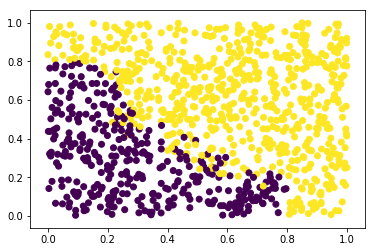

In [16]:
plt.scatter(df["bumpiness"], df["grade"], c=df["target"])

In [17]:
def draw(clf,X,y,h=0.05):
    
    plt.figure(figsize=(10,10))

    x_min, x_max = X[:, 0].min() - 0.05, X[:, 0].max() + .05
    y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    if clf is not None:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.scatter(xx,yy,c=Z)
    else:
        plt.scatter(xx,yy)
    
    plt.scatter(X[:,0],X[:,1],c=y,cmap="Paired")

# Kvecinos

Kvecinos necesita observaciones pasadas. Para predecir un nuevo punto, tengo que calcular la distancia que tiene ese nuevo punto frente a sus vecinos. K es el número de vecinos que voy a tener en cuenta. 

In [19]:
#Primero importo la libreria
from sklearn.neighbors import KNeighborsClassifier

In [20]:
#Luego calculo la distancia del clasificador
clf = KNeighborsClassifier(n_neighbors=5) #En este caso le doy 5 vecinos

In [21]:
clf.fit(X, y) #Pongo memoria de clasificador, todas las observaciones pasadas y su target. De esta manera "lo entreno"

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
#Y ahora quiero una prediccion
clf.predict([[0.1, 0.5]]) #0.1 de bumpiness y 0.5 de grade 

array([0.])

El 0 implica entonces que va lento

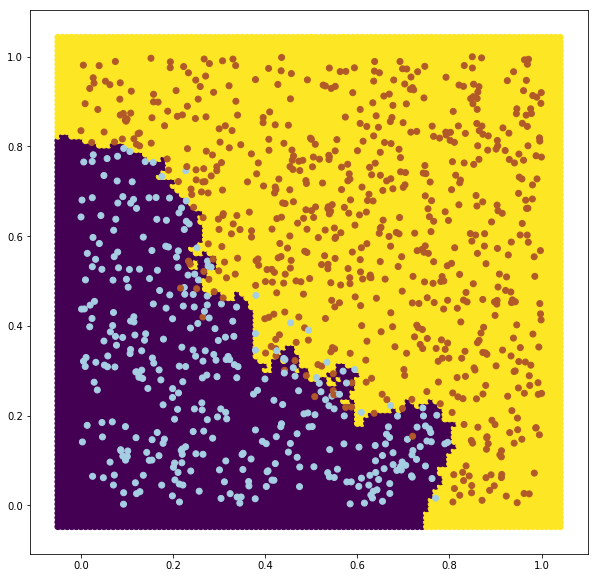

In [23]:
#Visualizar las predicciones que hizo el modelo
draw(clf,X.values,y.values, 0.01)

El clasificador es amarillo y azul. Veo en amarillo cuando va lento y en azul cuando va rápido. Entonces, si tiene mucha pendiente y mucho bache, va a ir lento y sino va a ir rápido.

In [24]:
#Ahora evalúo el modelo (el clasificador) con train y test

In [25]:
from sklearn.model_selection import train_test_split #importo train test de sklearn

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #genero el modelo


En la celda de arriba, veo que tengo mi X y mi y, mi tamaño de test (20%) y el random_state es cuál sería la semilla. Si tengo 100 muestras dentro de X y 100 dentro de y, toma 100 para hacer un test de X de 100 y uno de y. Esto me puede generar un imbalance de los datos, entonces necesito generar un 50% de X de rápido de un lado y un 50% de y en el otro. 

In [27]:
#Ahora si quiero saber que tal es mi modelo de bueno tengo que utilizar una métrica
from sklearn.metrics import accuracy_score #Accuracy es el procentaje de aciertos que tengo en la predicción

In [28]:
clf.fit(X_train, y_train) #Entreno el train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
accuracy_score(clf.predict(X_test), y_test) #Compraro las predicciones con los valores que tiene

0.95

Medí el accuracy score y me dio 95. Estos son los aciertos que he tenido a la hora de realizar mi predicción. 

In [35]:
accuracies=[]
for i in range(1,200):
    clf=KNeighborsClassifier(n_neighbors=i) #Genero mi clasificador con i vecinos
    clf.fit(X_train,y_train) #Entreno mi clasificados
    accuracies.append(accuracy_score(clf.predict(X_test),y_test))

Cuando tengo overfit, voy generalizando mas, hay un momento que generalizo suficiente y como le meta mas vecinos generalizo suficiente. Cuando el modelo esta overfit, el ruido lo considera como aprendizaje. En el caso de kvecinos necesitas jugar con los vecinos para ver como va el modelo. Entonces en 1 es overfit, en 500 es lo contrario. En el gráfico, overfitting y underfitting se ve por la curva, no por el valor.

In [36]:
from sklearn.model_selection import cross_val_score

Cuando hago cross validación, varío todo el rato el set de train y el set de test. Entonces, calculo accuracy para 3 modelos diferentes; lo que va a evaluar es la idea de utilizar un tipo de modelo para un modelo. Entonces, para hacer cross validación con skleanrl. Podria usar estos para encontrar el mejor número de vecinos? Si. Entocnes, uso el cross valid score. 

In [45]:
accuracies = cross_val_score (clf,X,y, cv=4) #Por defecto, me toma el accuracy.
accuracies

array([0.89243028, 0.896     , 0.904     , 0.87550201])

Entonces ahora tengo 4 accuracies distintas para cada cross_val_score

In [46]:
accuracies.mean() #Puedo calcular la media de los accuracies

0.8919830717291477

In [47]:
accuracies.std()

0.010396727040575683

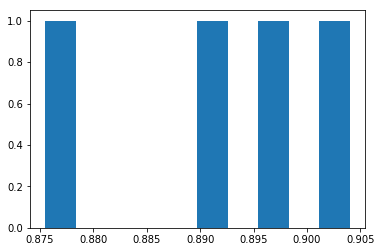

In [48]:
plt.hist(accuracies);

In [49]:
accuracies = []
for i in range (1, 200):
    clf= KNeighborsClassifier(n_neighbors=i)
    accuracies.append(cross_val_score(clf,X,y,cv=4).mean())

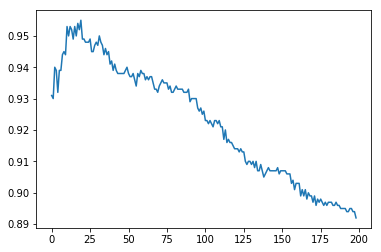

In [50]:
plt.plot(accuracies)

Vario el numero de vecinos y veo como va el cross val scroe (y). 

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
clf = GridSearchCV(KNeighborsClassifier(),
                  param_grid = {"n_neighbors":range(2,200)},
                  scoring = "accuracy",
                  cv=10) #Para cada vecino hace 2000 calculos para encontrar el mejor parametro

In [53]:
clf.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(2, 200)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [54]:
clf.best_params_ #La cantidad de vecinos optima seria 16

{'n_neighbors': 16}

In [55]:
clf_g = KNeighborsClassifier(**clf.best_params_)
clf_g.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')

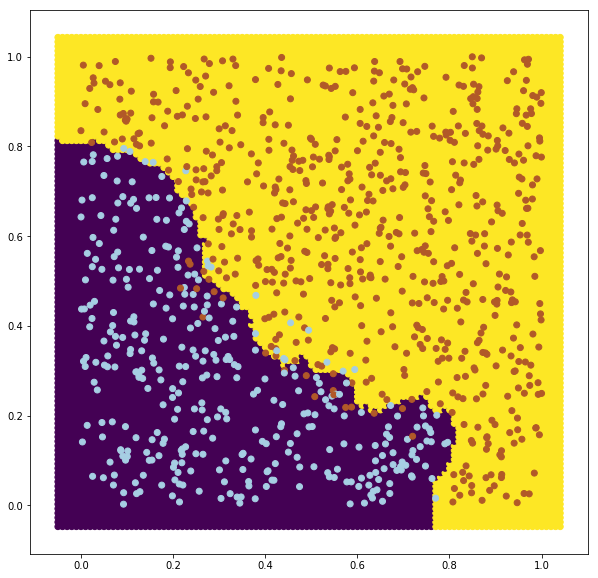

In [56]:
draw(clf_g,X.values,y.values,0.01)

Este gráfico me muestra el mejor k vecinos que puedo obtener de los datos

## Maquina Virtual de Soportes

In [57]:
from sklearn.svm import SVC

In [58]:
X = df[["bumpiness", "grade"]].values
y = df["target"]
clf = SVC (kernel = "linear", C = 0.1)
clf.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
clf=SVC(kernel="linear", C=0.1)

In [60]:
cross_val_score(clf,X,y,cv=10).mean()

0.9149844984498449

In [61]:
clf = GridSearchCV(SVC(kernel="linear", C=0.1),
                  param_grid = {"C":[0.01,.1,.5,.7,1,5,10]},
                  scoring = "accuracy",
                  cv=10)

In [62]:
clf.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 0.5, 0.7, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [63]:
clf.best_params_

{'C': 10}

In [64]:
df = pd.read_csv("terrain.csv")
x = df[["bumpiness", "grade"]].values
y = df["target"]

In [65]:
clf1 = SVC(kernel = "poly", degree = 3, C = 1)

In [66]:
cross_val_score(clf1, X, y, cv = 10).mean()

0.921074807480748

In [67]:
cross_val_score(clf1,X,y).mean()

0.9130113267441021

In [68]:
clf = GridSearchCV(SVC(kernel = "poly", degree = 3, C = 1),
                  param_grid = {"degree" : [2,3,4], "C" : [0.01,.1,.5,.7,1,5,10]},
                  scoring = "accuracy",
                  cv=4)

In [69]:
clf.fit(X,y)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'degree': [2, 3, 4], 'C': [0.01, 0.1, 0.5, 0.7, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

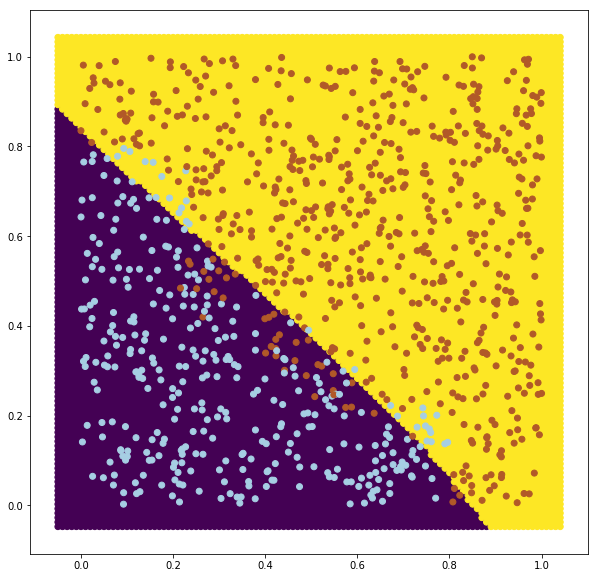

In [70]:
draw(clf, X, y, 0.01)

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.89      0.86      0.88        74
        1.0       0.92      0.94      0.93       126

avg / total       0.91      0.91      0.91       200



Recall es de todos los que estan en el set de test que vi que son 0, solo pude predecir que son 0 solo el 86%. La presicion me dice, de las que predije como 0 cuales son realmente 0.

## Árboles de decision

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
clf = DecisionTreeClassifier(max_depth=3)

In [75]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

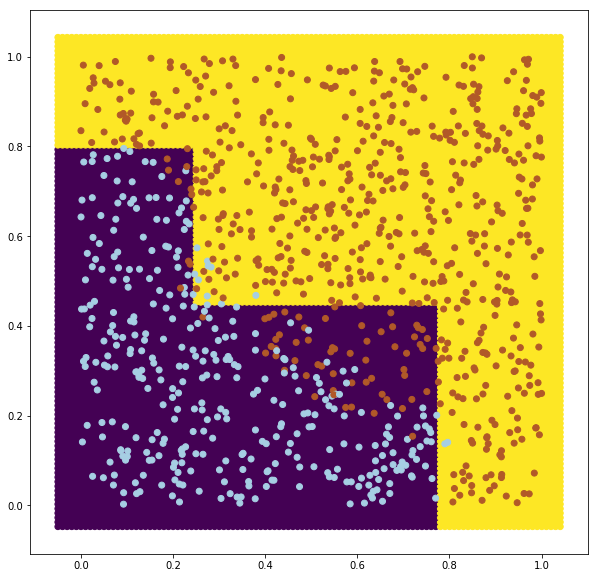

In [76]:
draw(clf, X, y, 0.01) #Lo importante es encontrar el max depth optimo para no hacer over o under fitting

Si no le pongo max depth voy a obtener overfitting. Al ponerle 1 me lo divide en 2. 

In [77]:
clf = GridSearchCV(DecisionTreeClassifier(), #Le doy un arbol de decision como parametro
                  param_grid = {"max_depth":range(1,20)},
                  scoring = "precision",
                  cv=10)

In [78]:
clf.fit(X,y) #hace un cross validation con max depth igual a 1,2,3, etc. El .fit modela

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='precision',
       verbose=0)

In [79]:
clf.best_params_ #Como vemos, al igual que vemos en el gráfico, el max depth optimo (la separacion que tiene que hacer) es 3

{'max_depth': 3}

In [80]:
#Para dibujar el arbol vamos a utilizar una libreria

In [81]:
import pydotplus

In [82]:
clf_g = DecisionTreeClassifier(**clf.best_params_)
clf_g.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [83]:
from IPython.display import Image 
from sklearn import tree

dot_data = tree.export_graphviz(clf_g, out_file = None)

In [84]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [85]:
Image(graph.create_png())

InvocationException: GraphViz's executables not found

## Curva de Roc

In [86]:
from sklearn.metrics import roc_curve

In [87]:
clf.predict_proba(X_test) #Todas las probabilidades de que sea 0 o 1 segun lo que tengo en test

array([[0.99404762, 0.00595238],
       [0.99404762, 0.00595238],
       [0.64497041, 0.35502959],
       [0.00244499, 0.99755501],
       [0.64497041, 0.35502959],
       [0.86075949, 0.13924051],
       [0.99404762, 0.00595238],
       [0.00244499, 0.99755501],
       [0.00244499, 0.99755501],
       [0.99404762, 0.00595238],
       [0.00244499, 0.99755501],
       [0.00244499, 0.99755501],
       [0.99404762, 0.00595238],
       [0.        , 1.        ],
       [0.00244499, 0.99755501],
       [0.64497041, 0.35502959],
       [0.64497041, 0.35502959],
       [0.00244499, 0.99755501],
       [0.00244499, 0.99755501],
       [0.00244499, 0.99755501],
       [0.86075949, 0.13924051],
       [0.        , 1.        ],
       [0.00244499, 0.99755501],
       [0.99404762, 0.00595238],
       [0.99404762, 0.00595238],
       [0.99404762, 0.00595238],
       [0.64497041, 0.35502959],
       [0.        , 1.        ],
       [0.00244499, 0.99755501],
       [0.99404762, 0.00595238],
       [0.

In [88]:
clf.predict_proba(X_test)[:,1] #Las probabilidades de que sea 1

array([0.00595238, 0.00595238, 0.35502959, 0.99755501, 0.35502959,
       0.13924051, 0.00595238, 0.99755501, 0.99755501, 0.00595238,
       0.99755501, 0.99755501, 0.00595238, 1.        , 0.99755501,
       0.35502959, 0.35502959, 0.99755501, 0.99755501, 0.99755501,
       0.13924051, 1.        , 0.99755501, 0.00595238, 0.00595238,
       0.00595238, 0.35502959, 1.        , 0.99755501, 0.00595238,
       0.99755501, 0.00595238, 1.        , 1.        , 0.35502959,
       0.99755501, 0.00595238, 1.        , 0.99755501, 0.99755501,
       0.99755501, 0.99755501, 0.77777778, 0.99755501, 0.99755501,
       0.99755501, 0.35502959, 0.35502959, 0.99755501, 0.13924051,
       0.99755501, 0.35502959, 1.        , 0.35502959, 0.00595238,
       1.        , 0.99755501, 0.13924051, 0.99755501, 0.99755501,
       0.99755501, 0.99755501, 0.00595238, 0.99755501, 0.99755501,
       0.35502959, 1.        , 0.00595238, 0.13924051, 0.00595238,
       0.99755501, 0.00595238, 0.99755501, 0.99755501, 0.99755

Podria hacer un clasificador naive que si es mas que 0,5 que sea 1 (Eso lo hace el Decission Tree). Entonces, la curva de ROC lo que hace es que cuando variamos el limite del 0.5, va a variar el comportamietno del clasificador.

In [89]:
fp, tp, _ = roc_curve(y_test, clf.predict(X_test))

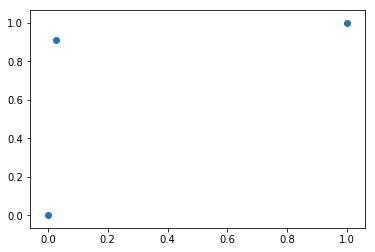

In [90]:
plt.scatter(fp,tp) #Y es como la presicion, de las de 1 cuantas son verdaderas y en X cuantos puntos que son 0 son predichos como 1
#Lo que interesa es que la curva sea lo mas abierta posible

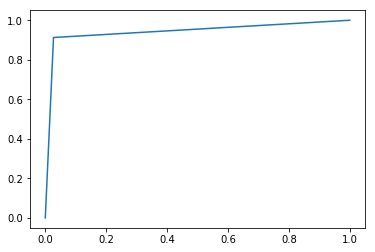

In [91]:
plt.plot(fp,tp)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
clf1 = DecisionTreeClassifier(max_depth=3)
clf2 = LogisticRegression ()

In [94]:
clf1.fit(X,y) #Entrenamos los dos modelos
clf2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
fp1, tp1,_ = roc_curve(y_test, clf1.predict_proba(X_test)[:,1])
fp2, tp2,_ = roc_curve(y_test, clf1.predict_proba(X_test)[:,1])

In [97]:
#Vemos que es un pelin mejor la regresion logistica